Predictive Modeling with Titanic Data

Goal: Trying to create a predictive model that determines if passengers survived the Titanic. We explored which characteristics made a person more likely to survive.  

In [2]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


Aquire data. Reading train.csv and test.csv data and prints first five rows.

In [3]:
# reading train.csv file and prints first five columns 
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# reading test.csv file and prints first five columns 
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Cleaning data. Removed Cabin column due to a lot of missing data. 

In [5]:
# test_data.drop() to delete Cabin column
test_data = test_data.drop(['Cabin'], axis=1)

In [6]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Calculations made to show survival rate of women and men on the Titanic 

In [7]:
# calcuates survival rate of women by dividing total amount of women passengers by the number of women passengers that survived 
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [8]:
# calcuates survival rate of men by dividing total amount of men passengers by the number of men passengers that survived 
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Calculations of passengers who survived in class 1, 2, or 3 

In [39]:
# survival rate of passengers in class 1
pclass = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_pclass1 = sum(pclass)/len(pclass)

print("% of passengers in Class 1 who survived:",rate_pclass1)

% of people in Class 1 who survived: 0.6296296296296297


In [41]:
# survival rate of passengers in class 2
pclass = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_pclass2 = sum(pclass)/len(pclass)

print("% of passengers in Class 2 who survived:",rate_pclass2)

% of passengers in Class 2 who survived: 0.47282608695652173


In [42]:
# survival rate of passengers in class 3
pclass = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_pclass3 = sum(pclass)/len(pclass)

print("% of passengers in Class 3 who survived:",rate_pclass3)

% of passengers in Class 3 who survived: 0.24236252545824846


Visualizations of passengers by gender, passengers who survived based on gender, class, and age. We thought these would be the most important attributes to consider, especially visually, of a passenger's chance of survival. So, we compared these to the 'Survived' column, as well as to each other.

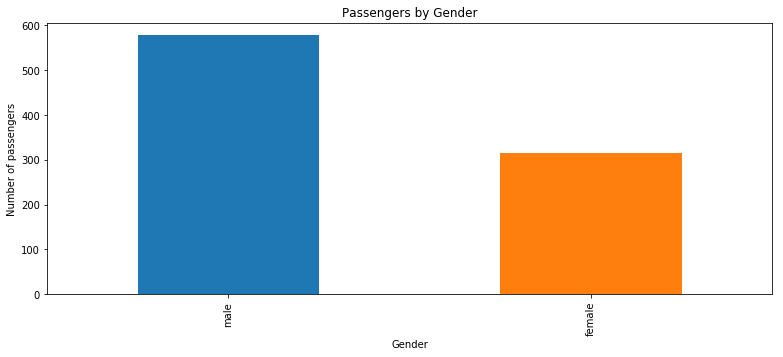

In [72]:
# plotting total number of passengers by gender 
train_data = pd.read_csv("train.csv")
train_data.Sex.value_counts().nlargest(20).plot(kind='bar', figsize=(13,5))
plt.title("Passengers by Gender")
plt.ylabel('Number of passengers')
plt.xlabel('Gender');

This gender plot of survial was very informative, and is a good visual of the percentage we found earlier, which is why it
should be included in our final predictive model.

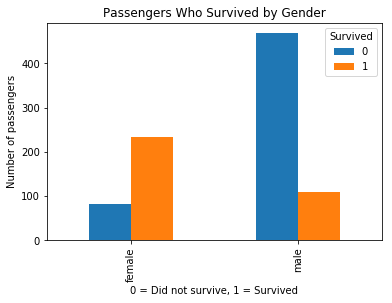

In [147]:
# plotting passengers who survived and did not survive by gender 
train_data = pd.read_csv("train.csv")
train_data.groupby(['Sex','Survived']).size().unstack().plot(kind='bar',stacked=False)
plt.title("Passengers Who Survived by Gender")
plt.ylabel('Number of passengers')
plt.xlabel('0 = Did not survive, 1 = Survived');
plt.show()

As you can see, similar to gender, class was also an important factor in survival. Those in class 3 had the lowest survival rate while those in class 1 had the highest. This is a good representation of the percentages we found earlier. This is an 
important factor that has to be included in the final model.

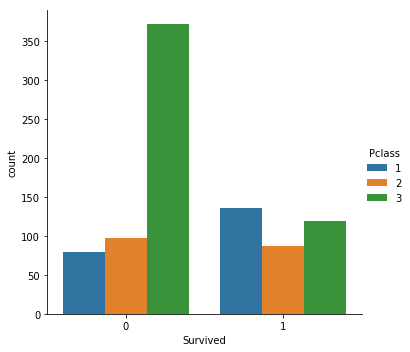

In [9]:
#Shows how many passengers survived from each class
sns.catplot('Survived',data=train_data,kind='count',hue='Pclass')

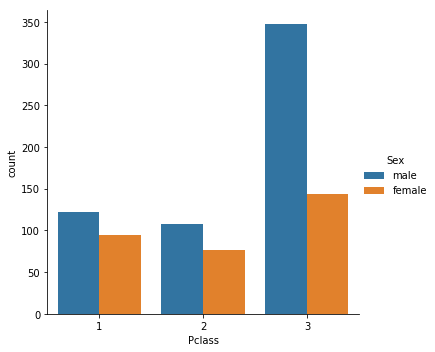

In [10]:
#This shows how many men and women were in each class
sns.catplot('Pclass',data=train_data,hue='Sex',kind='count')

These graphs are reprensative of the passengers ages. After looking at these, we felt that age was not 
the best indicator of survival, so we decided to exclude it from our predictive model. While it is interesting that the ages
were more evenly represented in Class 1, as opposed to the others, it was not as relevant to what we were trying to predict.

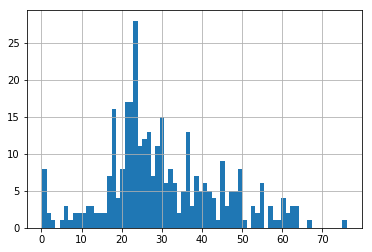

In [12]:
# this graph represents the ages of the passengers in the Titanic
test_data['Age'].hist(bins=70)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


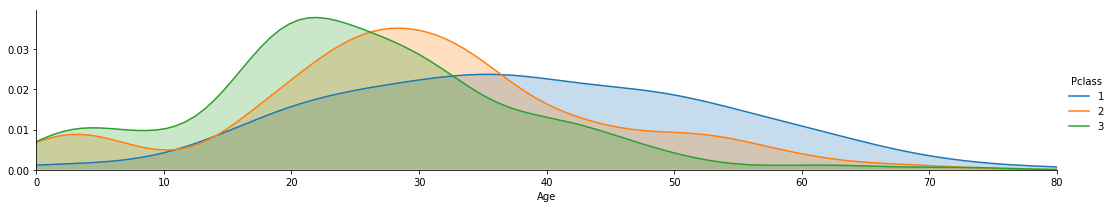

In [11]:
#Show a comparison of ages across classes
as_fig = sns.FacetGrid(train_data,hue='Pclass',aspect=5)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = train_data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

Finding out the probability of survival based on the Pclass, Sex, SibSp, and Parch features.

In [8]:
# imports RandomForestClassifier from skelearn.ensemble
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

#These are the features we examined earlier. As you can see, we included gender and class
#but did not include age
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# n estimators = sample size taken from test data 
# max _depth = size/depth of tree
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# creating dataframe that lets passengers and their predictive survival as 1 or 0 that copies to a csv file and saves it
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
